<a href="https://colab.research.google.com/github/TonyRahme/cs480student/blob/main/CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

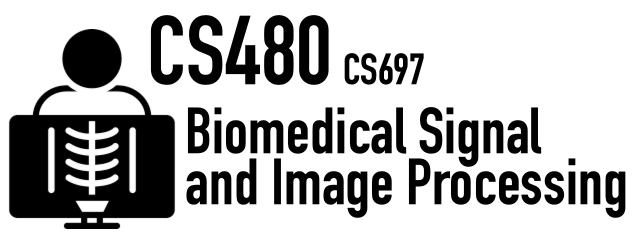
# Assignment 1


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [ ]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [ ]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
sample9to11sec = ecg[SAMPLING_RATE*8-50:SAMPLING_RATE*10]
#starting had to be 50 samples before 9th second to detect entire first heartbeat
sample9to11sec

array([ 0.605,  0.605,  0.605,  0.615,  0.645,  0.685,  0.71 ,  0.7  ,
        0.7  ,  0.695,  0.705,  0.745,  0.755,  0.775,  0.78 ,  0.78 ,
        0.78 ,  0.79 ,  0.81 ,  0.83 ,  0.825,  0.83 ,  0.84 ,  0.86 ,
        0.87 ,  0.875,  0.88 ,  0.87 ,  0.89 ,  0.92 ,  0.935,  0.93 ,
        0.915,  0.92 ,  0.91 ,  0.91 ,  0.94 ,  0.955,  0.94 ,  0.915,
        0.915,  0.95 ,  0.94 ,  0.905,  0.875,  0.865,  0.86 ,  0.845,
        0.815,  0.8  ,  0.775,  0.77 ,  0.78 ,  0.76 ,  0.725,  0.71 ,
        0.7  ,  0.695,  0.71 ,  0.695,  0.69 ,  0.685,  0.67 ,  0.65 ,
        0.65 ,  0.66 ,  0.645,  0.645,  0.66 ,  0.695,  0.72 ,  0.75 ,
        0.77 ,  0.79 ,  0.8  ,  0.81 ,  0.845,  0.88 ,  0.9  ,  0.88 ,
        0.84 ,  0.815,  0.82 ,  0.83 ,  0.84 ,  0.83 ,  0.795,  0.775,
        0.76 ,  0.75 ,  0.745,  0.72 ,  0.68 ,  0.64 ,  0.635,  0.64 ,
        0.645,  0.655,  0.655,  0.645,  0.645,  0.645,  0.63 ,  0.615,
        0.6  ,  0.6  ,  0.61 ,  0.615,  0.625,  0.605,  0.57 ,  0.57 ,
      

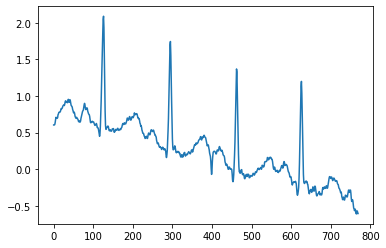

In [ ]:
plt.plot(sample9to11sec)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk


In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


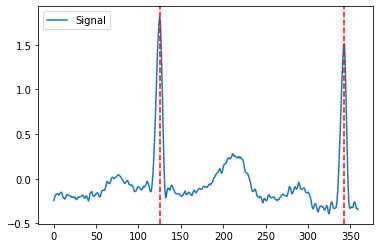

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

In [ ]:
_, rpeaks9to11 = nk.ecg_peaks(sample9to11sec, sampling_rate=SAMPLING_RATE)

In [ ]:
#looking at all rpeaks from 9 to 11 seconds
print(rpeaks9to11['ECG_R_Peaks'])

[126 295 462 626]


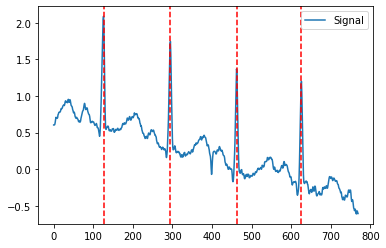

In [ ]:
#plotting the detected R spikes from 9 to 11 seconds
plot = nk.events_plot(rpeaks9to11['ECG_R_Peaks'], sample9to11sec)

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 
"""
There are 4 r-peaks detected in 2 seconds, which means the heart-rate is estimated around 120bpm which is a fast-rate heartbeat

"""

'\nThere are 4 r-peaks detected in 2 seconds, which means the heart-rate is estimated around 120bpm which is a fast-rate heartbeat\n\n'

In [ ]:
sample1minute = ecg[:SAMPLING_RATE*60]
_, rpeaks1minute = nk.ecg_peaks(sample1minute, sampling_rate=SAMPLING_RATE)
print(size(rpeaks1minute['ECG_R_Peaks']), "bpm")


110 bpm


**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

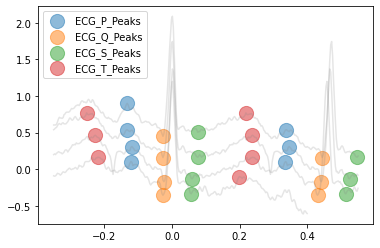

In [ ]:
_, waves_peak = nk.ecg_delineate(sample9to11sec, rpeaks9to11, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [ ]:
# TODO Does the detection work well?

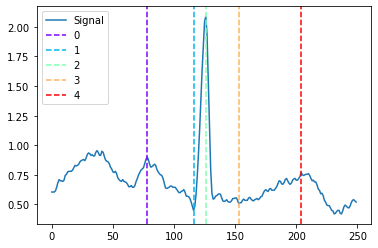

In [ ]:
#For 1 heartbeat, first cycle of the 9 to 11 second sample
plot = nk.events_plot(
                      [
                       waves_peak['ECG_P_Peaks'][:1],
                       waves_peak['ECG_Q_Peaks'][:1],
                       rpeaks9to11['ECG_R_Peaks'][:1],
                       waves_peak['ECG_S_Peaks'][:1],
                       waves_peak['ECG_T_Peaks'][:1],
                       ], sample9to11sec[:250])

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

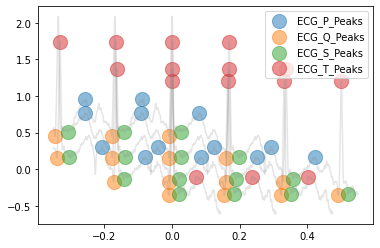

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.
_, waves_peak_improve = nk.ecg_delineate(sample9to11sec, rpeaks9to11, sampling_rate=1000, show=True, show_type='peaks')

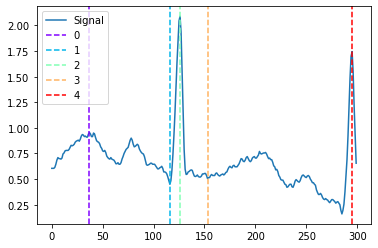

In [ ]:
plot = nk.events_plot(
                      [
                       waves_peak_improve['ECG_P_Peaks'][:1],
                       waves_peak_improve['ECG_Q_Peaks'][:1],
                       rpeaks9to11['ECG_R_Peaks'][:1],
                       waves_peak_improve['ECG_S_Peaks'][:1],
                       waves_peak_improve['ECG_T_Peaks'][:1],
                       ], sample9to11sec[:300])

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
sample9to11filter = nk.signal_filter(sample9to11sec, sampling_rate=1000, lowcut=None,highcut=270)

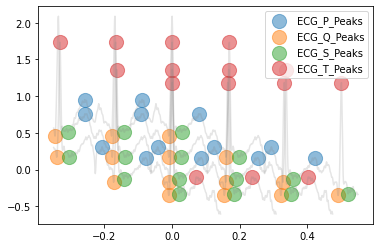

In [ ]:
_, waves_peak_filter = nk.ecg_delineate(sample9to11filter, rpeaks9to11, sampling_rate=1000, show=True, show_type='peaks')

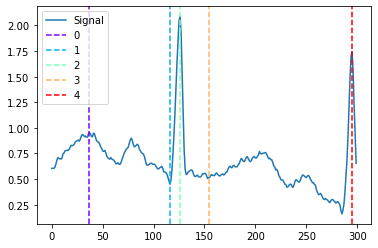

In [ ]:
plot = nk.events_plot(
                      [
                       waves_peak_filter['ECG_P_Peaks'][:1],
                       waves_peak_filter['ECG_Q_Peaks'][:1],
                       rpeaks9to11['ECG_R_Peaks'][:1],
                       waves_peak_filter['ECG_S_Peaks'][:1],
                       waves_peak_filter['ECG_T_Peaks'][:1],
                       ], sample9to11sec[:300])

In [ ]:
# TODO Does the filtering improve the result?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#